Code implementation of - **A. Alahmadi, M. Hussain, H. Aboalsamh, G. Muhammad, G. Bebis, and H. Mathkour, “Passive detection of image forgery using dct and local binary pattern,” Signal, Image and Video Processing, vol. 11, no. 1, pp. 81–88, Jan 2017. [Online]. Available: https://doi.org/10.1007/s11760-016-0899-0**

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import seaborn as sns
from scipy.fftpack import dct
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Block-size (non-overlapping)
split_width = 16
split_height = 16

# LBP parameters
P = 8
R = 1.0
P

8

In [3]:
# This function devides an image into blocks
# parameters
#     parameter(1) : size of the image
#     parameter(2) : splitting size
#     parameter(3) : amount of overlapping (by default 0)
# return type  : return a list of starting points of the blocks

def start_points(size, split_size, overlap=0):
    points = [0]
    stride = int(split_size * (1-overlap))
    counter = 1
    while True:
        pt = stride * counter
        if pt + split_size >= size:
            points.append(size - split_size)
            break
        else:
            points.append(pt)
        counter += 1
    return points

In [4]:
# This function extracts features from all the images in a folder
# parameters : 
#     parameter(1) : path to the folder
#     parameter(2) : class label of the images in that folder(forged or not)
# return types : stores the features in the list 

def feature_extraction(path_to_folder, class_label):
    for file_name in os.listdir(path_to_folder):
        
        # join image file name with the path to the folder
        # to get full path of the image file
        path_to_img = os.path.join(path_to_folder,file_name)
        img = cv2.imread(path_to_img)
        
        
        
        # if the image file is empty or didn't load continue from beginining
        if np.shape(img) == ():
            continue
            
        # converts the image into YCrCb color space and take the Cr component only
        img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) 
        img = img[:,:,1]
        img_h, img_w = img.shape
        
        
        # calculates the starting points of the blocks
        X_points = start_points(img_w, split_width, 0.0)
        Y_points = start_points(img_h, split_height, 0.0)
        
        
        # calculates dct for eact block of an image
        dct_blocks=[]
        for i in Y_points:
            for j in X_points:
                block = img[i:i+split_height, j:j+split_width] # contains the non-overlapping block 
                lbp = local_binary_pattern(block, P, R, method='default')
                dct_block = dct(lbp, type=2, n=None, axis=-1, norm=None, overwrite_x=False)
                dct_blocks.append(dct_block)
        
        dct_blocks_array=np.asarray(dct_blocks)
        
        _,r,c=dct_blocks_array.shape
        
        
        img_std_list=[] #length should be r*c i.e 16*16=256 in our case.
        with_name_list=[file_name,class_label]
        
        for x in range(r):
            for y in range(c):
                pixel_depth_subarr = dct_blocks_array[:,x,y]
                std = np.std(pixel_depth_subarr)
                img_std_list.append(std)
                with_name_list.append(std)
        
        #name_list.append(file_name) 
        #feature_vector.append(img_std_list)
        #label.append(class_label)
        dataframe_list.append(with_name_list)

In [5]:
split_width

16

In [6]:
#feature_vector=[]
#label=[]
# name_list=[]
dataframe_list=[]

# #CASIA V1.0 dataset
au_path = "E:\FinalProject\learning\dataset\working\CASIA1\Au\Au" 
tp_path1 = "E:\FinalProject\learning\dataset\working\CASIA1\Modified Tp\Tp\CM"
tp_path2 = "E:\FinalProject\learning\dataset\working\CASIA1\Modified Tp\Tp\Sp"
feature_extraction(au_path, 0)
feature_extraction(tp_path1, 1)
feature_extraction(tp_path2, 1)
# Columbia dataset
# au_path="YOUR_PATH/Columbia_ImSpliceDataset/authentic"
# tp_path="YOUR_PATH/Columbia_ImSpliceDataset/spliced"
# feature_extraction(au_path, 0)
# feature_extraction(tp_path, 1)

# CASIA V2.0 Dataset
# au_path="YOUR_PATH/CASIA2.0_revised/Au"
# tp_path="YOUR_PATH/CASIA2.0_revised/Tp"
# feature_extraction(au_path, 0)
# feature_extraction(tp_path, 1)

In [7]:
#print("Length/Dimension of features", len(feature_vector[0]))
#print("Length of feature vector", len(feature_vector))
#print("length of label",len(label))

In [8]:
df=pd.DataFrame(dataframe_list)
df.rename(columns = {0: "image_names"}, inplace = True)
# df['label']=label #To add label column as well

df.tail()

,image_names,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
1716,Sp_D_NRN_R_arc0051_arc0073_0569.jpg,1,1891.898586,476.644343,226.568475,252.196192,229.521211,180.469856,190.614167,213.391685,...,27.379336,27.040679,23.978827,22.632958,23.835544,28.285079,27.892339,33.264917,28.628263,29.346154
1717,Sp_D_NRN_R_art0008_sec0027_0570.jpg,1,1348.348380,534.776422,275.465382,287.365557,230.245279,236.286385,201.851711,213.731255,...,32.907943,25.687967,27.996128,25.256144,30.256779,36.373091,30.230063,38.710832,34.857002,34.548036
1718,Sp_D_NRN_R_cha0054_cha0017_0571.jpg,1,1605.189544,804.477093,620.934011,447.221841,375.279524,283.169035,314.279600,300.789602,...,34.558033,35.894729,35.529211,41.143273,39.416597,40.713021,42.694143,45.798662,42.278111,61.653876
1719,Sp_D_NRN_R_nat0013_nat0012_0572.jpg,1,1482.222501,784.864024,621.201196,362.086544,366.147202,342.715004,288.554644,301.737631,...,39.469802,38.990114,37.914855,39.019128,46.355589,45.869105,45.092569,48.572722,48.738253,72.693481
1720,Sp_D_NRN_T_sec0098_art0002_0573.jpg,1,1523.457187,568.782862,450.022573,286.526987,258.547764,213.533583,223.286087,188.331114,...,28.963606,26.340244,27.979522,26.176137,31.926438,29.653102,29.737373,41.608645,33.308703,89.632157


In [9]:
scaler_norm = MinMaxScaler() 
df.iloc[:,1:] = scaler_norm.fit_transform(df.iloc[:,1:].to_numpy()) # Normalising the values in dataframe.

C:\Users\User\AppData\Local\Temp\ipykernel_6384\460671013.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1:] = scaler_norm.fit_transform(df.iloc[:,1:].to_numpy()) # Normalising the values in dataframe.


In [10]:
# path_csv="CASIA2_feature.csv"
path_csv="CASIA1_feature.csv"
# path_csv="Columbia_feature.csv"

df.to_csv(path_csv) #saving dataframe to csv.

## Classification using the extracted features

In [11]:
#df=pd.read_csv('YOUR_PATH/___features.csv')
df=pd.read_csv("CASIA1_feature.csv")
array=df.values
x_feature=array[:,3:]
y_label=array[:,2].astype('int')
print(x_feature.shape)
print(y_label.shape)

(1721, 256)
(1721,)


In [12]:
# Split the data
X_train,X_test,Y_train,Y_test=train_test_split(x_feature,y_label,test_size=0.10,random_state=7)

In [13]:
#train model
model_SVC = SVC(C=32,kernel='rbf',gamma=0.03125)
#model_SVC = SVC(C=32,gamma=0.03125, kernel='rbf') #Can also try for GridSearch yourself
model_SVC.fit(X_train,Y_train) 

SVC(C=32, gamma=0.03125)

In [14]:
def show_confusion_matrix(actual_values, predicted_values):
    confusion_matrix = metrics.confusion_matrix(actual_values, predicted_values)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,
                                                display_labels = [False, True])
    cm_display.plot()
    plt.title("Confusion Matrix")
    plt.show()
    
    
    
def show_cross_validation_score(model_SVC, X_train, Y_train):
    kfold=KFold(n_splits=10)
    cv_results=cross_val_score(model_SVC, X_train, Y_train,cv=kfold, scoring='accuracy')
    msg="%s %f %s" % ("Overall Accuracy",cv_results.mean()*100,"%")
    x = np.array(["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5",
                  "Fold 6", "Fold 7", "Fold 8", "Fold 9", "Fold 10"])
    plt.barh(x, cv_results * 100, color = "green", height = .5)
    plt.xlabel("Folds")
    plt.ylabel("Accuracy")
    plt.title("Accuracy in each fold in cross validation " + "(" + msg + ")")
    plt.show()
    
    
    
def show_classification_report(actual_values, predicted_values):
    labels = np.arange(2)
    target_names = list("01")
    clf_report = classification_report(actual_values,
                                   predicted_values,
                                   labels=labels,
                                   target_names=target_names,
                                   output_dict=True)
    # .iloc[:-1, :] to exclude support
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
    
    
    
def show_model_performance(actual_values, predicted_values):
    print("Model Accuracy : ")
    print(accuracy_score(actual_values,predicted_values))
    print("Cross Validation Result : ")
    show_cross_validation_score(model_SVC,X_train,Y_train)
    print("Confusion Matrix : ")
    show_confusion_matrix(actual_values, predicted_values)
    print("Other Statistics : ")
    show_classification_report(actual_values, predicted_values)

In [15]:
#test model
predictions=model_SVC.predict(X_test)

Model Accuracy : 
0.9710982658959537
Cross Validation Result : 


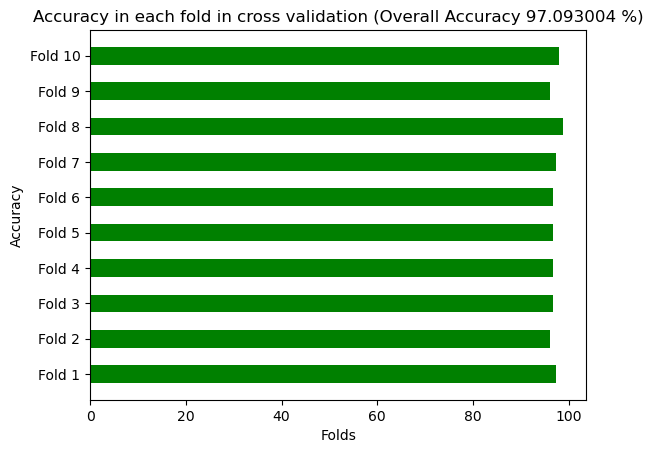

Confusion Matrix : 


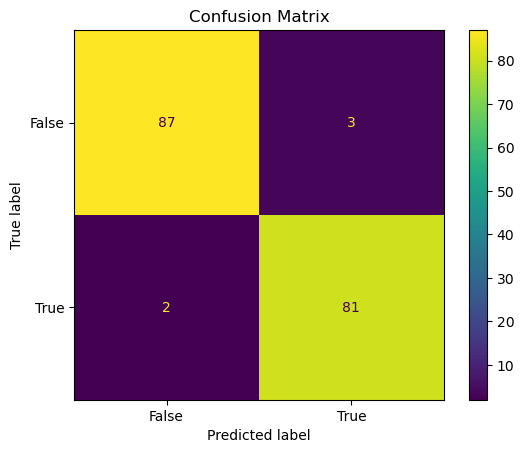

Other Statistics : 


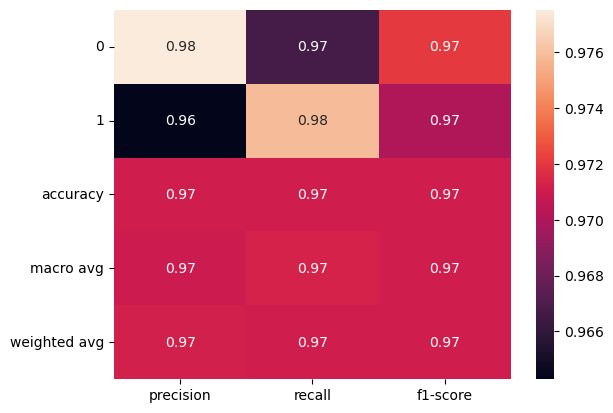

In [16]:
#displaying different reports on the model
show_model_performance(Y_test, predictions)